In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [5]:
class TrafficSimulation:
    def __init__(self, road_length=100, traffic_density=0.03, max_velocity=5, probability_slow_down=0.5, flow_reference_point=None):
        self.road_len = road_length
        self.traff_dens = traffic_density
        self.max_vel = max_velocity
        self.prob_slow = probability_slow_down
        self.fl_ref = flow_reference_point if flow_reference_point else random.randint(0, self.road_len - 1)
        self.fl_count = 0
       
        self.traff_state = self.initialize_traffic()
        
    def initialize_traffic(self):
        self.fl_count = 0
        traff_state = np.repeat(-1, self.road_len)
        num_cars = self.probabilistic_round(self.traff_dens * self.road_len)
        car_locs = np.random.choice(traff_state.size, num_cars, replace=False)
        traff_state[car_locs] = self.init_velocity(num_cars)

        return traff_state
    
    def run_simulation(self, num_iter=25, display=True):
        self.traff_state = self.initialize_traffic()
        self.fl_count = 0
        
        for it in range(num_iter):
            self.update_velocities()
            if display:
                self.display() 
            self.advance_cars()
            
        return self.fl_count / num_iter

    def update_velocities(self):
        car_locs = np.where(self.traff_state != -1)[0]
        for i, car_loc in enumerate(car_locs):
            if len(car_locs) > 1:
                next_car = i + 1 if i + 1 < len(car_locs) else 0
                dist_to_next_car = (car_locs[next_car] - car_loc) % self.road_len   
            else:
                dist_to_next_car = self.road_len
            
            # acceleration
            if self.traff_state[car_loc] < self.max_vel and self.traff_state[car_loc] + 1 < dist_to_next_car:
                self.traff_state[car_loc] += 1
            
            # slowing
            if self.traff_state[car_loc] >= dist_to_next_car:
                self.traff_state[car_loc] = dist_to_next_car - 1
                
            # random slowing
            rand_num = random.random()
            if rand_num < self.prob_slow and self.traff_state[car_loc] > 0:
                self.traff_state[car_loc] -= 1          
    
    def advance_cars(self):
        car_locs = np.where(self.traff_state != -1)[0]
        for car_loc in car_locs:
            cur_vel = self.traff_state[car_loc]
            next_loc = (car_loc + cur_vel * 1) % self.road_len
            self.update_flow(car_loc, next_loc)
            self.traff_state[car_loc] = -1
            self.traff_state[next_loc] = cur_vel
            

    def update_flow(self, car_loc, next_loc):
        bound_passed = next_loc < car_loc
        
        if bound_passed:
            self.fl_count += 1
        
    def display(self):
        cur_dens = np.sum(self.traff_state != -1) / self.traff_state.size
        print(''.join('·' if x == -1 else str(x) for x in self.traff_state) + '\t' + str(cur_dens))
        
    @staticmethod
    def probabilistic_round(num):
        return int(math.floor(num + random.random()))
    
    def init_velocity(self, num_cars):
        rand_vels = np.random.randint(self.max_vel, size=num_cars)
        return rand_vels

In [6]:
traff_sim = TrafficSimulation(traffic_density=0.1)

In [7]:
traff_sim.run_simulation()

·······························0··1····1·0···4······················2····1··3··············3···1····	0.1
·······························0···2····01·······4····················2···1····4··············1·2···	0.1
·······························0·····2··1·1··········5··················1··1·······4···········1··2·	0.1
2······························0·······1·1·1··············5··············1··2··········4········1···	0.1
··3····························0········0·1·2··················4··········2···3············5·····2··	0.1
·····4·························0········1··1··3····················5········2····3··············1··3	0.1
··3······5·····················1·········2··2····4······················4·····2·····3············1··	0.1
·····3········4·················1··········1··2······4······················3···3······3··········2·	0.1
3·······3·········5··············2··········1···2········4·····················2···3······3·········	0.1
···3·······4···········4···········3·········2····3····

0.4

### PCW 4.2

In [9]:
NUM_SIM = 40
NUM_ITER = 400

traff_dens_linspace = np.linspace(0, 0.8, 50)
flow_storage = []

for traff_dens in traff_dens_linspace:
    traff_sim = TrafficSimulation(traffic_density=traff_dens)
    flow_storage.append([traff_sim.run_simulation(num_iter=NUM_ITER, display=False) for i in range(NUM_SIM)])

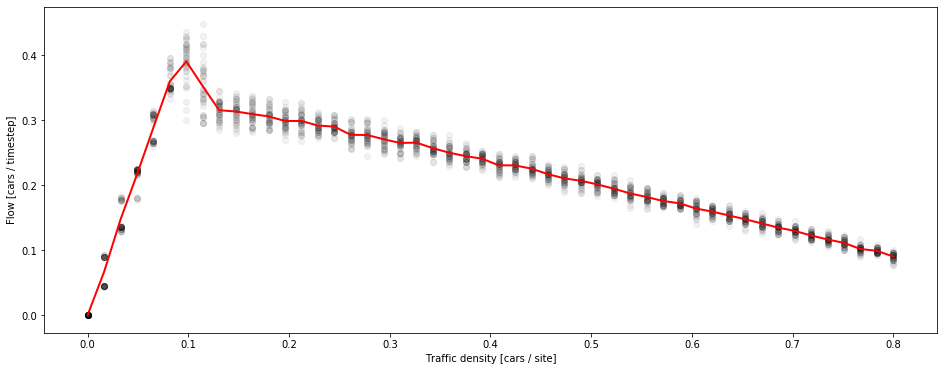

In [15]:
flow_store = np.array(flow_storage)
mean_flows = flow_store.mean(axis=1)

plt.figure(figsize=(16, 6))
plt.plot(traff_dens_linspace, mean_flows, linewidth=2, color='red')
for j in range(flow_store.shape[1]):
    plt.scatter(traff_dens_linspace, flow_store[:, j], color='black', alpha=0.05)
plt.ylabel('Flow [cars / timestep]')
plt.xlabel('Traffic density [cars / site]')
plt.show()